# Project: Wrangle and Analyze Data

## Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import tweepy
import json
import re
import seaborn as sns

**1. Twitter archive file**

In [2]:
#Read CSV file 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Tweeter image predictions**

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
#import tweepy
from tweepy import OAuthHandler
#import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '.....'
consumer_secret = '.....'
access_token = '.....'
access_secret = '.....'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
succ_count = 0
fail_count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            succ_count += 1
        except tweepy.TweepError as e:
            #print("Fail")
            fails_dict[tweet_id] = e
            fail_count += 1
            pass
end = timer()
print(end - start)
print(fails_dict)

Rate limit reached. Sleeping for: 737
Rate limit reached. Sleeping for: 737
1911.0705067600002
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 837012587749474308: TweepError([{'code': 144, 'message': '

In [7]:
print("Successful count: ", succ_count)
print("Failure count: ", fail_count)

Successful count:  2339
Failure count:  17


In [4]:
tweet_json_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        tweet_line_dict = json.loads(line)
        tweet_id = tweet_line_dict['id']
        favorite_count = tweet_line_dict['favorite_count']
        retweet_count = tweet_line_dict['retweet_count']
        tweet_json_list.append({'tweet_id': int(tweet_id),
                                'favorite_count': int(favorite_count),
                                'retweet_count': int(retweet_count)})
        
df_tweet_json = pd.DataFrame(tweet_json_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])

## Access Data

##### df_twitter_archive dataframe

In [5]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Note:** There are a lot missing values in 'in_reply_to_status_id', and 'in_reply_to_user_id'. Those missing values in retweeted related columns might be because some of these are just retweet records, not the original tweet.

In [7]:
df_twitter_archive['retweeted_status_timestamp'].value_counts()

2016-06-08 02:41:38 +0000    1
2015-12-29 04:31:49 +0000    1
2016-10-23 00:27:05 +0000    1
2016-10-06 01:23:05 +0000    1
2016-05-19 01:38:16 +0000    1
2016-08-28 16:51:16 +0000    1
2016-03-20 23:23:54 +0000    1
2017-05-02 00:04:57 +0000    1
2015-11-27 19:11:49 +0000    1
2016-11-19 19:55:41 +0000    1
2016-02-12 17:22:12 +0000    1
2017-05-12 16:05:02 +0000    1
2016-09-25 00:06:08 +0000    1
2017-01-11 02:15:36 +0000    1
2015-11-16 04:02:55 +0000    1
2016-12-12 16:16:49 +0000    1
2015-11-19 03:29:07 +0000    1
2016-11-20 00:59:15 +0000    1
2016-09-01 16:14:48 +0000    1
2016-09-19 01:42:24 +0000    1
2016-03-21 19:29:52 +0000    1
2017-02-19 01:23:00 +0000    1
2017-06-19 17:14:49 +0000    1
2017-06-08 03:32:35 +0000    1
2017-03-01 18:47:10 +0000    1
2016-10-19 15:37:03 +0000    1
2016-08-08 01:44:46 +0000    1
2017-03-08 01:41:24 +0000    1
2017-03-04 00:21:08 +0000    1
2016-10-25 16:00:09 +0000    1
                            ..
2016-08-11 20:40:41 +0000    1
2017-02-

In [6]:
# Check the value below: we seems to have duplicated values in 'expanded_urls'.
sum(df_twitter_archive['expanded_urls'].duplicated())

137

In [8]:
df_twitter_archive['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [9]:
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
df_twitter_archive['text'].value_counts()

This is Chip. He only mowed half the yard. 8/10 quit the shit Chip we have other things to do https://t.co/LjzZKQ7vmK                                                   1
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u                                                                                                              1
RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…                            1
This pupper just descended from heaven. 12/10 can probably fly https://t.co/X6X9wM7NuS                                                                                  1
This is Jeph. He's a Western Sagittarius Dookmarriot. Frightened by leaf. Caught him off guard. 10/10 calm down Jeph https://t.co/bicyOV6lju                            1
THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA              

**Note:** The text contains rating (rating_numerator, rating_denominator). We need to be careful if the numbers are correctly extracted from the 'text' column.

In [13]:
rating_with_decimal_text = []
rating_with_decimal_index = []
rating_with_decimal = []

for i, text in df_twitter_archive['text'].iteritems():
    if re.search(r"(\d+\.\d*\/\d+)", text):
        rating_with_decimal_text.append(text)
        rating_with_decimal_index.append(i)
        rating_with_decimal.append(re.search(r"(\d+\.\d*)", text).group(0))

# Print the text to confirm presence of ratings with decimals
for i in range(len(rating_with_decimal_index)):
    print("Label index: {}, text: {}".format(rating_with_decimal_index[i], rating_with_decimal_text[i]))
    print("Rating_numerator: {}, rating_denominator: {}, rating with decimals: {}".format(df_twitter_archive.loc[rating_with_decimal_index[i]]["rating_numerator"],\
                                                                                        df_twitter_archive.loc[rating_with_decimal_index[i]]["rating_denominator"],\
                                                                                        rating_with_decimal[i]))
    print()

Label index: 45, text: This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Rating_numerator: 5, rating_denominator: 10, rating with decimals: 13.5

Label index: 340, text: RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
Rating_numerator: 75, rating_denominator: 10, rating with decimals: 9.75

Label index: 695, text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Rating_numerator: 75, rating_denominator: 10, rating with decimals: 9.75

Label index: 763, text: This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Rating_numerator: 27, rating_denominator: 10, rating with decimals: 11.27

Label index: 1689, text: I've been told 

**Note:** Looks like some of the rating_numerator and rating_denominator are not correctly extracted from 'text' column!

In [14]:
df_twitter_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [16]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# Note: some of of 'rating_denominator' values are not standard 10!
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# Note: some of the name are not real names: like 'a', 'an' etc. Another thing: 'None' is used for NULL value.
df_twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Daisy          7
Buddy          7
Toby           7
Bailey         7
Oscar          6
Leo            6
Jax            6
Scout          6
Bella          6
Rusty          6
Jack           6
Dave           6
Stanley        6
Koda           6
Milo           6
very           5
            ... 
Willem         1
Ed             1
Tug            1
Howie          1
Shelby         1
Farfle         1
Aqua           1
Jo             1
Rizzo          1
Rascal         1
Jebberson      1
Ralpher        1
Rontu          1
Kingsley       1
Tedders        1
Billl          1
Maxwell        1
Skittle        1
Hero           1
Crawford       1
Jockson        1
Kara           1
Barry          1
Andy           1
Glacier        1
Edd            1
Akumi          1
Molly         

In [19]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

**Note:** the dog stage columns use 'None' for NULL values.

##### df_image_predictions dataframe

In [10]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image_predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                2
https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg                2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg                2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                2
https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg    2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                2
https://pbs.twimg.com/med

In [24]:
df_image_predictions['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
# Note: some of the dog breeds have first letter in uppercase, some of the dog breeds have first letter in lowercase.
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [26]:
df_image_predictions['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [27]:
df_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
df_image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
chow                               20
Samoyed                            20
toy_terrier                        20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [30]:
df_image_predictions['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

##### df_tweet_json

In [13]:
df_tweet_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37700,8215
1,892177421306343426,32380,6075
2,891815181378084864,24384,4017
3,891689557279858688,41014,8370
4,891327558926688256,39205,9074
5,891087950875897856,19715,3010
6,890971913173991426,11530,1989
7,890729181411237888,63588,18252
8,890609185150312448,27097,4133
9,890240255349198849,31077,7135


In [14]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [5]:
df_tweet_json['favorite_count'].value_counts()

0        167
1115       5
329        4
2739       4
1555       3
1981       3
1785       3
7910       3
1433       3
959        3
236        3
1123       3
578        3
2518       3
1855       3
441        3
2328       2
1203       2
5333       2
1215       2
660        2
1265       2
2741       2
3316       2
2721       2
31611      2
7284       2
3182       2
2349       2
1105       2
        ... 
17858      1
6760       1
37479      1
21093      1
2600       1
555        1
557        1
27182      1
2608       1
561        1
12851      1
2612       1
3487       1
7189       1
8769       1
579        1
10820      1
6726       1
2196       1
33353      1
4687       1
593        1
27218      1
21077      1
12887      1
2635       1
10450      1
607        1
4705       1
8177       1
Name: favorite_count, Length: 1981, dtype: int64

In [6]:
df_tweet_json['retweet_count'].value_counts()

861     5
2069    5
245     5
590     4
504     4
217     4
654     4
65      4
57      4
570     4
1214    4
486     4
559     4
722     4
2010    4
380     4
1369    4
598     4
232     4
127     4
4293    4
1772    4
449     4
321     4
239     4
525     4
838     3
374     3
1034    3
1964    3
       ..
4525    1
431     1
4529    1
1317    1
272     1
437     1
441     1
445     1
2450    1
2448    1
4495    1
397     1
4435    1
347     1
357     1
2406    1
4455    1
2410    1
589     1
2418    1
1454    1
373     1
375     1
2434    1
4483    1
2436    1
389     1
393     1
395     1
4093    1
Name: retweet_count, Length: 1695, dtype: int64

### Quality Issues (some of these won't be cleaned)

#### twitter_archive dataframe
> - Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
> - timestamp and retweeted_status_timestamp are currently of type 'object'
> - There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.
> - Some of the values in 'rating_denominator' column are not stanard value (10). This introduces difficulties when readers/users of the dataset scan through the dataframe and try to get the idea of what the dog ratings are.
> - Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27)
> - Some of the names in 'name' column are not real names. Those won't be cleaned since we won't use these names for analysis.
> - Some columns (such as dog stage columns - 'doggo', 'pupper', 'puppo', 'floofer') use 'None', instead of NaN for NULL value. Those won't be cleaned neither. Since we won't refer/use NULL values from these columns. String like 'None', 'other' are fine, since they are distinct (categorical) values.
> - Some values in rating_numerator column are too large which might be outliners. However, these are not quality issues in Data Wrangling phase. We will leave those until analysis phase.
> - Some values in 'p1_dog' are False. These could introduce issues like how should we determine the dog breed? or are the quailty of the images good enough (acceptable)? (We may use 'p2_dog', 'p3_dog', but the probability of these might be too low for us to use). Those might related to the Machine Learning/Deep Learning classifier and are not part of the data quailty issue. We will leave this until data analysis phase.

#### image predictions dataframe
> - There are 2356 rows in df_twitter_achive dataframe and 2075 rows in df_image_predictions dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.
> - p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

#### tweeter json dataframe
> - There are 17 missing tweets compared to the twitter1 datagrame


### Tidiness
> - Three dataframes df_twitter_archive, df_image_predictions, and df_tweet_json should be one (combined table) since all tables' entries are each describing one tweet

#### df_twitter_archive table
> - one variable in four columns (doggo, floofer, pupper, and puppo)

## Clean

### Tidiness Issue 1: Combine all 3 dataframes

### Quality Issue 1: Missing data in df_twitter_archive - tweets with no image (inconsistent number of rows between df_twitter_archive & df_image_predictions)

### Quality Issue 2: Tweets with no status (inconsistent number of rows between df_twitter_archive & df_tweet_json)

#### Define 
**Issue:** df_image_predictions should be combined with df_twitter_archive since they are information about the same tweet. 
**Solution:** merge the 2 datasets together on 'tweet_id'. Note: we will use 'left' merge, then remove the rows which does not have image.

#### Code

In [5]:
# Perform a merge first
df_clean_final = pd.merge(df_twitter_archive, df_image_predictions, how='left', on=['tweet_id'])

# Remove the rows which does not have image
df_clean_final = df_clean_final[df_clean_final['jpg_url'].isnull() == False]

#### Test

In [6]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

#### Define
**Issue:** df_tweet_json should be combined with the other 2 dataframes since they are information about the same tweet. 
**Solution:** merge df_tweet_json with the previously merged dataframe together on 'tweet_id'. Note: we will use 'inner' merge - 'Tweet_id's of df_tweet_json is a subset of those in df_twitter_archive - we use the 'tweet_id' from the latter to query twitter and get back information to form df_tweet_json. In the way, some of the information got dropped due to no status errors. Hence 'inner' merger should be appropriate.

#### Code

In [7]:
"""
Now perform an 'inner' merge on df_clean_final and df_tweet_json.
Note: we got df_tweet_json from the tweet_id in df_twitter_archive, so the tweet_id in df_tweed_json is a subset of those in
      df_twitter_archive, hence it's safe to use 'inner' merge to just pick up the intersection of the 2 dataframes.
"""
df_clean_final = pd.merge(df_clean_final, df_tweet_json, how='inner', on=['tweet_id'])

#### Test

In [8]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

### Tidiness Issue 2: Multiple columns represent 'dog_stage'.

#### Define
**Issue:** 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo).
**Solution:** Get dog stage values from the above 4 columns and fill it into the new 'dog_stage' column, then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. Note: some cells will have multiple dog stages which is fine. Our analysis later won't use these multiple dog stage cells. (In other situations, we may either drop these cells, or make the dog stage a categorical variable - these "multiple stage" stage is one distinct value).

#### Code

In [9]:
print(df_clean_final['doggo'].value_counts())
print("#####")
print(df_clean_final['floofer'].value_counts())
print("#####")
print(df_clean_final['pupper'].value_counts())
print("#####")
print(df_clean_final['puppo'].value_counts())

None     1986
doggo      80
Name: doggo, dtype: int64
#####
None       2058
floofer       8
Name: floofer, dtype: int64
#####
None      1844
pupper     222
Name: pupper, dtype: int64
#####
None     2042
puppo      24
Name: puppo, dtype: int64


In [10]:
# Create a new column for dog stages. Initialize the value to 'None'.
df_clean_final['dog_stage'] = 'None'

def get_dog_stage(row):
    dog_stage = []
    
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
        
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1:
        row['dog_stage'] = 'None'
    else:
        row['dog_stage'] = ",".join(dog_stage)
        
    return row

df_clean_final = df_clean_final.apply(get_dog_stage, axis=1)
df_clean_final = df_clean_final.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [11]:
df_clean_final['dog_stage'].value_counts()

None             1745
pupper            211
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [12]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
jpg_url                       2066 non-null object
img_num                       2066 non-null float64
p1                            2066 non-null object
p1_conf                       2066 non-null float64
p1_dog                        206

### Quality Issue 3: Remove retweets

#### Define
**Issue:** Data contains retweets.
**Solution:** Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.

#### Code

In [13]:
df_clean_final = df_clean_final[df_clean_final['retweeted_status_id'].isnull() == True]

df_clean_final = df_clean_final.drop(['retweeted_status_id', 
                                      'retweeted_status_user_id', 
                                      'retweeted_status_timestamp'], 
                                     axis=1)

#### Test

In [14]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
jpg_url                  1991 non-null object
img_num                  1991 non-null float64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog                   1991 non-null bool
p3                       1991 non-null object
p3_conf                  

### Quality Issue 4: Delete columns that won't be used for analysis.

#### Define
**Issue:** There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.
**Solution:** Drop undesired columns.

#### Code

In [15]:
df_clean_final = df_clean_final.drop(['source',
                                      'in_reply_to_status_id',
                                      'in_reply_to_user_id',
                                      'expanded_urls',
                                      'img_num'], axis=1)

#### Test

In [16]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 19 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null object
text                  1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
jpg_url               1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null bool
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
dog_stage             1991 non-null object
dtypes: bool(3), float64(3), int64(5), object(8)
memory usage: 270.3+ KB


### Quality Issue 5: p1, p2, p3 inconsistent capitalization (sometimes first letter is capital)

#### Define
**Issues:** p1, p2, p3 inconsistent capitalization (sometimes first letter is capital).
**Solutions:** Make all strings in p1, p2, and p3 lowercase.

#### Code

In [17]:
df_clean_final['p1'] = df_clean_final['p1'].str.lower()
df_clean_final['p2'] = df_clean_final['p2'].str.lower()
df_clean_final['p3'] = df_clean_final['p3'].str.lower()

#### Test

In [18]:
df_clean_final.head(15)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37700,8215,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,32380,6075,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24384,4017,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,41014,8370,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39205,9074,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,19715,3010,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,11530,1989,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,63588,18252,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,27097,4133,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,31077,7135,doggo


### Quality Issue 6: Timestamp field is in object format

#### Define
**Issue:** 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object'. 
**Solution:** Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted).

#### Code

In [19]:
df_clean_final['timestamp'] = pd.to_datetime(df_clean_final['timestamp'])

#### Test

In [20]:
df_clean_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 19 columns):
tweet_id              1991 non-null int64
timestamp             1991 non-null datetime64[ns]
text                  1991 non-null object
rating_numerator      1991 non-null int64
rating_denominator    1991 non-null int64
name                  1991 non-null object
jpg_url               1991 non-null object
p1                    1991 non-null object
p1_conf               1991 non-null float64
p1_dog                1991 non-null bool
p2                    1991 non-null object
p2_conf               1991 non-null float64
p2_dog                1991 non-null bool
p3                    1991 non-null object
p3_conf               1991 non-null float64
p3_dog                1991 non-null bool
favorite_count        1991 non-null int64
retweet_count         1991 non-null int64
dog_stage             1991 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(5), object(7)
memory u

In [21]:
df_clean_final.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37700,8215,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,32380,6075,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24384,4017,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,41014,8370,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39205,9074,None


### Quality Issue 7: Inaccurate ratings

#### Define
**Issue:** Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).
**Solution:** Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

#### Code

In [22]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
rating_with_decimal_text = []
rating_with_decimal_index = []
rating_with_decimal = []

for i, text in df_clean_final['text'].iteritems():
    if re.search(r"(\d+\.\d*\/\d+)", text):
        rating_with_decimal_text.append(text)
        rating_with_decimal_index.append(i)
        rating_with_decimal.append(re.search(r"(\d+\.\d*)", text).group(0))

# Print the text to confirm presence of ratings with decimals
for i in range(len(rating_with_decimal_index)):
    print("Label index: {}, text: {}".format(rating_with_decimal_index[i], rating_with_decimal_text[i]))
    print("Rating_numerator: {}, rating_rating_denominator: {}, rating with decimals: {}".format(df_clean_final.loc[rating_with_decimal_index[i]]["rating_numerator"],\
                                                                                        df_clean_final.loc[rating_with_decimal_index[i]]["rating_denominator"],\
                                                                                        rating_with_decimal[i]))
    print()

Label index: 40, text: This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Rating_numerator: 5, rating_rating_denominator: 10, rating with decimals: 13.5

Label index: 552, text: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Rating_numerator: 75, rating_rating_denominator: 10, rating with decimals: 9.75

Label index: 608, text: This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Rating_numerator: 27, rating_rating_denominator: 10, rating with decimals: 11.27

Label index: 1445, text: Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
Rating_numerator: 26, rating_rating_denominator: 10, rating with decimals: 11.26



In [23]:
df_clean_final.loc[rating_with_decimal_index[0],'rating_numerator'] = float(rating_with_decimal[0])
df_clean_final.loc[rating_with_decimal_index[1],'rating_numerator'] = float(rating_with_decimal[1])
df_clean_final.loc[rating_with_decimal_index[2],'rating_numerator'] = float(rating_with_decimal[2])
df_clean_final.loc[rating_with_decimal_index[3],'rating_numerator'] = float(rating_with_decimal[3])

#### Test

In [24]:
print(df_clean_final.loc[40, "rating_numerator"])
print(df_clean_final.loc[552, "rating_numerator"])
print(df_clean_final.loc[608, "rating_numerator"])
print(df_clean_final.loc[1445, "rating_numerator"])

13.5
9.75
11.27
11.26


### Quality Issue 8: Unstandardized ratings

#### Define
**Issue:** Some of the values in 'rating_denominator' column are not stanard value (10). This introduces difficulties when readers/users of the dataset scan through the dataframe and try to get the idea of what the dog ratings are.
**Solution:** Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'. One number is easier to use/interpret than 2 numbers.

#### Code

In [25]:
 df_clean_final['rating'] = df_clean_final['rating_numerator'] / df_clean_final['rating_denominator']

#### Test

In [26]:
df_clean_final.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,37700,8215,None,1.3


## Store Data

In [27]:
# Save twitter dataframe to a CSV file
df_clean_final.to_csv('twitter_archive_master.csv', index=False)

## Insights about Data (Visualizations and Analyses)

In [3]:
df = pd.read_csv('twitter_archive_master.csv')

### Research Question 1: What are the dog breeds which got top 20 ratings? What are the favorite counts and retweet counts associated with them?

In [3]:
# Take a look at the distributions for the 'rating'
df.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,rating
count,1.991000e+03,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000,1991.000000,1991.000000
mean,7.358012e+17,12.237961,10.532898,0.593546,1.344798e-01,6.030671e-02,8641.325465,2620.823707,1.164872
std,6.744689e+16,41.502410,7.326197,0.271878,1.006249e-01,5.089760e-02,12681.834564,4678.554565,4.067361
min,6.660209e+17,0.000000,2.000000,0.044333,1.011300e-08,1.740170e-10,77.000000,11.000000,0.000000
25%,6.758342e+17,10.000000,10.000000,0.362716,5.409535e-02,1.622240e-02,1855.000000,584.500000,1.000000
50%,7.084699e+17,11.000000,10.000000,0.587372,1.175080e-01,4.952370e-02,3911.000000,1258.000000,1.100000
75%,7.877641e+17,12.000000,10.000000,0.844583,1.950575e-01,9.164355e-02,10760.000000,2990.500000,1.200000
max,8.924206e+17,1776.000000,170.000000,1.000000,4.880140e-01,2.734190e-01,162736.000000,82813.000000,177.600000


In [51]:
df[df['rating'] == 0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
234,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0.0,10,None,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,swing,0.967066,False,american_staffordshire_terrier,0.012731,True,staffordshire_bullterrier,0.007039,True,23400,3206,None,0.0
754,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I cou...",0.0,10,None,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False,3003,312,None,0.0


In [53]:
# Print out the text where the rating equals minimum - 0
print(df.loc[234]['text'])
print(df.loc[754]['text'])

# They don't look like mistakes.

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


In [5]:
# Check out the rating greater than 75% in the distributions.
df[df['rating'] > 2]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
384,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,tibetan_mastiff,0.036708,True,labrador_retriever,0.025823,True,5645,1556,None,3.428571
724,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,5328,2607,None,177.600000
1715,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,420.0,10,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,24724,8870,None,42.000000


In [6]:
# Check the 'text'.
print(df.loc[384]['text'])
print()
print(df.loc[724]['text'])
print()
print(df.loc[1715]['text'])

# The 2nd and 3rd ones looks crazy! Let's treat them as outliners.

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [7]:
# Excludes those outliners.
df_no_dog_breed_outliner = df[df['rating'] < 5]
print(len(df_no_dog_breed_outliner))

1989


In [8]:
# Note: some of the dogs are not classified as dogs - per 'p1_dog' column (which is according to the highest predicted probabilities).
# Let's trust the predictions from 'p1' column.
df_true_dogs = df_no_dog_breed_outliner[df_no_dog_breed_outliner['p1_dog'] == True]
len(df_true_dogs)

1474

In [9]:
# Only pick up top 20 ratings
df_high_rating_dog_breed = df_true_dogs.groupby('p1').mean().sort_values(by='rating', ascending=False)[:20]

# Only include interested columns
df_high_rating_dog_breed = df_high_rating_dog_breed[['favorite_count', 'retweet_count', 'rating']]
df_high_rating_dog_breed

,favorite_count,retweet_count,rating
p1,,,
saluki,23043.000000,4797.500000,1.250000
briard,9028.000000,2771.000000,1.233333
tibetan_mastiff,11533.000000,3897.250000,1.225000
border_terrier,12945.285714,3165.000000,1.214286
standard_schnauzer,1926.000000,853.000000,1.200000
giant_schnauzer,11795.666667,3571.333333,1.200000
silky_terrier,6962.000000,1742.000000,1.200000
eskimo_dog,14119.722222,5128.000000,1.177778
golden_retriever,11810.446043,3415.647482,1.175516


In [10]:
high_rating_dog_breeds_s1 = df_high_rating_dog_breed['rating']
high_rating_dog_breeds_s1

p1
saluki                     1.250000
briard                     1.233333
tibetan_mastiff            1.225000
border_terrier             1.214286
standard_schnauzer         1.200000
giant_schnauzer            1.200000
silky_terrier              1.200000
eskimo_dog                 1.177778
golden_retriever           1.175516
gordon_setter              1.175000
irish_setter               1.175000
samoyed                    1.174359
chow                       1.160976
cardigan                   1.152941
wire-haired_fox_terrier    1.150000
great_pyrenees             1.150000
australian_terrier         1.150000
kelpie                     1.145455
pembroke                   1.144318
norfolk_terrier            1.142857
Name: rating, dtype: float64

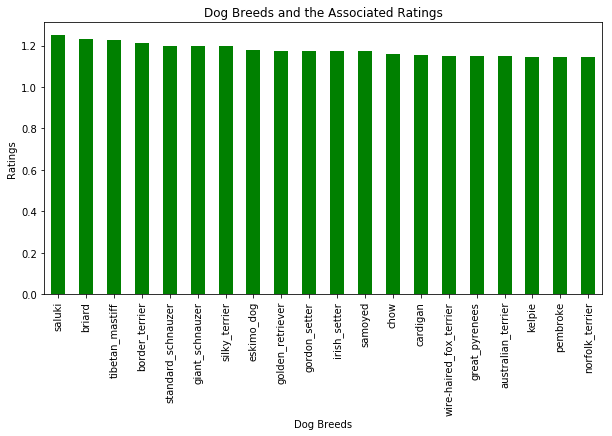

In [11]:
high_rating_dog_breeds_s1.plot(kind='bar', color='green', figsize=(10,5));
plt.xlabel("Dog Breeds")
plt.ylabel("Ratings")
plt.title("Dog Breeds and the Associated Ratings");

In [12]:
high_rating_dog_breeds_s2 = df_high_rating_dog_breed['favorite_count']
high_rating_dog_breeds_s2

p1
saluki                     23043.000000
briard                      9028.000000
tibetan_mastiff            11533.000000
border_terrier             12945.285714
standard_schnauzer          1926.000000
giant_schnauzer            11795.666667
silky_terrier               6962.000000
eskimo_dog                 14119.722222
golden_retriever           11810.446043
gordon_setter               5220.000000
irish_setter               10047.500000
samoyed                    12798.871795
chow                        9634.658537
cardigan                   14557.176471
wire-haired_fox_terrier     8084.000000
great_pyrenees             12246.214286
australian_terrier         10596.500000
kelpie                      9666.636364
pembroke                   10972.409091
norfolk_terrier             5362.142857
Name: favorite_count, dtype: float64

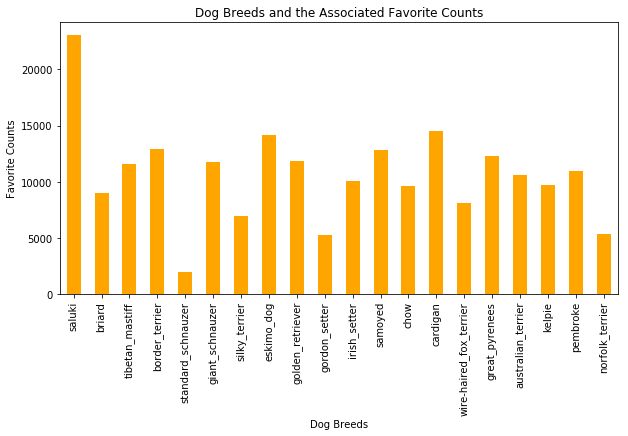

In [13]:
high_rating_dog_breeds_s2.plot(kind='bar', color='orange', figsize=(10,5));
plt.xlabel("Dog Breeds")
plt.ylabel("Favorite Counts")
plt.title("Dog Breeds and the Associated Favorite Counts");

In [14]:
high_rating_dog_breeds_s3 = df_high_rating_dog_breed['retweet_count']
high_rating_dog_breeds_s3

p1
saluki                     4797.500000
briard                     2771.000000
tibetan_mastiff            3897.250000
border_terrier             3165.000000
standard_schnauzer          853.000000
giant_schnauzer            3571.333333
silky_terrier              1742.000000
eskimo_dog                 5128.000000
golden_retriever           3415.647482
gordon_setter              2317.500000
irish_setter               3146.750000
samoyed                    4212.589744
chow                       2711.414634
cardigan                   4226.411765
wire-haired_fox_terrier    2732.000000
great_pyrenees             4390.357143
australian_terrier         2880.000000
kelpie                     2317.000000
pembroke                   2999.738636
norfolk_terrier            1812.714286
Name: retweet_count, dtype: float64

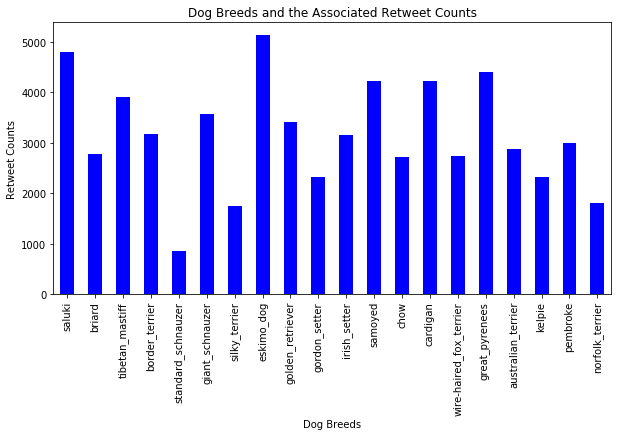

In [16]:
high_rating_dog_breeds_s3.plot(kind='bar', color='blue', figsize=(10,5));
plt.xlabel("Dog Breeds")
plt.ylabel("Retweet Counts")
plt.title("Dog Breeds and the Associated Retweet Counts");

**Among the dog breeds which get top 20 ranking in ratings, the top 3 ranking in favorite counts are: saluki, cardigan and eskimo_dog; and the top 3 ranking in retweet counts are: eskimo_dog, saluki and great_pyrenees.**            

In [4]:
# Let's see if there any coorelations among ratings, favorite counts and retweet counts
df_subset = df[['rating', 'favorite_count', 'retweet_count']]
df_subset.corr()

,rating,favorite_count,retweet_count
rating,1.000000,0.021381,0.022159
favorite_count,0.021381,1.000000,0.929615
retweet_count,0.022159,0.929615,1.000000


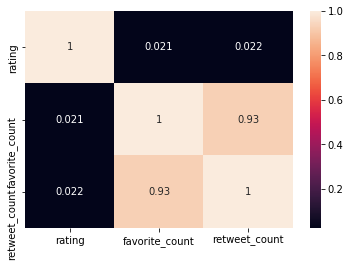

In [6]:
sns.heatmap(df_subset.corr(), annot=True);

**Rating does not have high correlations with favorite_count/retweet_count, while favorite_count does have high correlations with retweet_count.** 

### Research Question 2: What are the to favored dogs in the past three years?

In [17]:
top_favored_dog_breed_s = df_true_dogs.groupby('p1').favorite_count.mean().sort_values(ascending=False)[:20]
top_favored_dog_breed_s

p1
saluki                     23043.000000
french_bulldog             18165.560000
afghan_hound               16416.333333
black-and-tan_coonhound    16237.500000
flat-coated_retriever      16042.750000
irish_water_spaniel        15584.333333
standard_poodle            15090.000000
english_springer           14941.888889
cardigan                   14557.176471
leonberg                   14174.666667
eskimo_dog                 14119.722222
basset                     13235.307692
lakeland_terrier           13104.437500
border_terrier             12945.285714
samoyed                    12798.871795
bedlington_terrier         12399.000000
great_pyrenees             12246.214286
mexican_hairless           12066.000000
golden_retriever           11810.446043
giant_schnauzer            11795.666667
Name: favorite_count, dtype: float64

In [21]:
# Get top 20 most favored dog breeds
# Make a copy from df_true_dogs first
df_top_favored_dog_breed = df_true_dogs.copy()
top_favored_dog_breed_list = list(top_favored_dog_breed_s.index)

df_top_favored_dog_breed['top_favored'] = False

for i, dog_breed in df_top_favored_dog_breed['p1'].iteritems():
    if dog_breed in top_favored_dog_breed_list:
        df_top_favored_dog_breed.loc[i, 'top_favored'] = True

# Only keep top 20 favored dogs
df_top_favored_dog_breed = df_top_favored_dog_breed[df_top_favored_dog_breed['top_favored'] == True]

# Only keep interested columns
df_top_favored_dog_breed = df_top_favored_dog_breed[['p1', 'favorite_count', 'retweet_count', 'rating', 'top_favored', 'timestamp']]
df_top_favored_dog_breed
# Rename 'p1' to 'dog_breed'
df_top_favored_dog_breed = df_top_favored_dog_breed.rename({'p1': 'dog_breed'}, axis=1)
df_top_favored_dog_breed

,dog_breed,favorite_count,retweet_count,rating,top_favored,timestamp
4,basset,39205,9074,1.20,True,2017-07-29 16:00:24
10,samoyed,29882,7093,1.30,True,2017-07-26 00:31:25
11,french_bulldog,27087,4818,1.30,True,2017-07-25 16:11:53
13,french_bulldog,26406,4384,1.20,True,2017-07-25 00:10:02
14,golden_retriever,14725,2178,1.30,True,2017-07-24 17:02:04
16,golden_retriever,28365,4359,1.20,True,2017-07-23 00:22:39
17,golden_retriever,24884,4140,1.30,True,2017-07-22 16:56:37
19,french_bulldog,21187,3375,1.20,True,2017-07-20 16:49:33
20,basset,29411,5210,1.30,True,2017-07-19 16:06:48
23,mexican_hairless,32795,10097,1.30,True,2017-07-18 16:08:03


In [24]:
# Divide timestamps into years for easier analyzing
df_top_favored_dog_breed['year'] = 'Year 2015'

def get_tweet_year(row):
    if row['timestamp'] >= '2015-01-01' and row['timestamp'] < '2016-01-01':
        row['year'] = 'Year 2015'
    elif row['timestamp'] >= '2016-01-01' and row['timestamp'] < '2017-01-01':
        row['year'] = 'Year 2016'
    elif row['timestamp'] >= '2017-01-01' and row['timestamp'] < '2018-01-01':
        row['year'] = 'Year 2017'
    
    return row

df_top_favored_dog_breed = df_top_favored_dog_breed.apply(get_tweet_year, axis=1)
df_top_favored_dog_breed = df_top_favored_dog_breed.drop('top_favored', axis=1)
df_top_favored_dog_breed

,dog_breed,favorite_count,retweet_count,rating,timestamp,year
4,basset,39205,9074,1.20,2017-07-29 16:00:24,Year 2017
10,samoyed,29882,7093,1.30,2017-07-26 00:31:25,Year 2017
11,french_bulldog,27087,4818,1.30,2017-07-25 16:11:53,Year 2017
13,french_bulldog,26406,4384,1.20,2017-07-25 00:10:02,Year 2017
14,golden_retriever,14725,2178,1.30,2017-07-24 17:02:04,Year 2017
16,golden_retriever,28365,4359,1.20,2017-07-23 00:22:39,Year 2017
17,golden_retriever,24884,4140,1.30,2017-07-22 16:56:37,Year 2017
19,french_bulldog,21187,3375,1.20,2017-07-20 16:49:33,Year 2017
20,basset,29411,5210,1.30,2017-07-19 16:06:48,Year 2017
23,mexican_hairless,32795,10097,1.30,2017-07-18 16:08:03,Year 2017


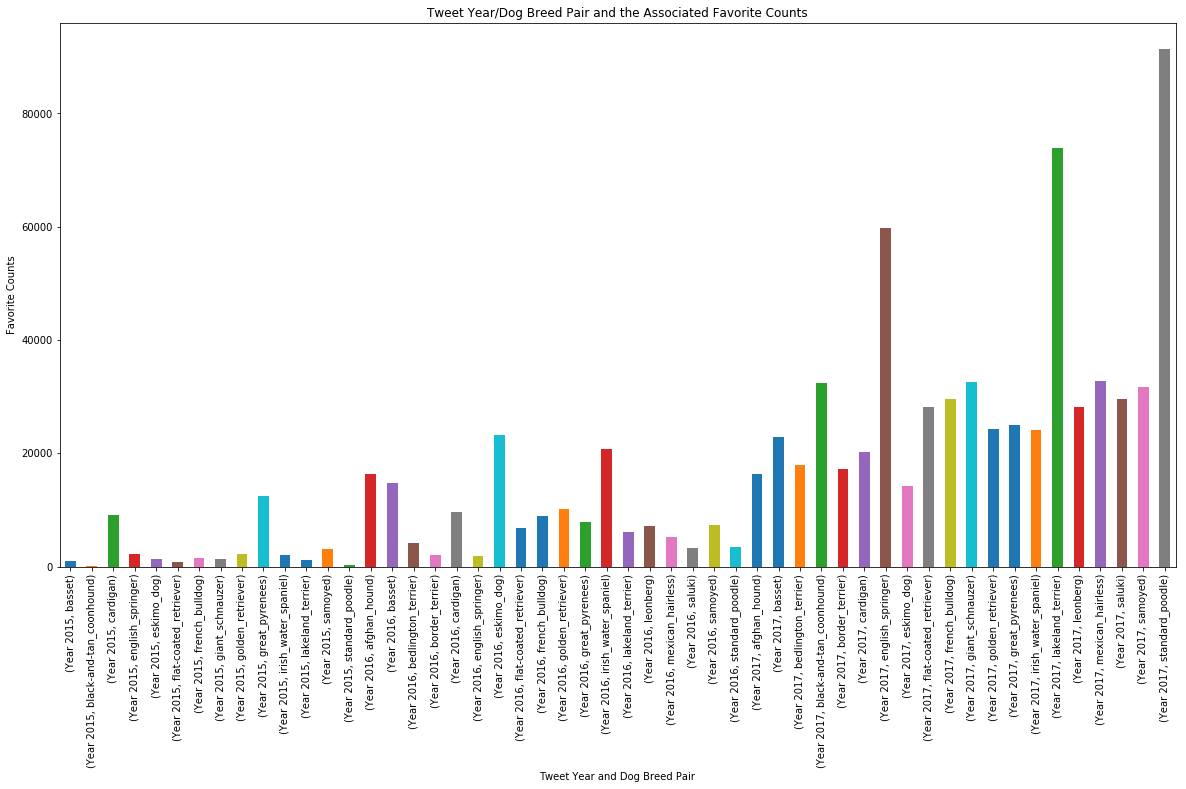

In [50]:
# Let's plot groupby 'year' and dog_breed' and get the mean on favorite counts.
df_top_favored_dog_breed.groupby(['year','dog_breed']).favorite_count.mean().plot(kind='bar', figsize=(20, 10));
plt.xlabel("Tweet Year and Dog Breed Pair")
plt.ylabel("Favorite Counts")
plt.title("Tweet Year/Dog Breed Pair and the Associated Favorite Counts");

**Top 2 favored dog breeds in 2015 are: great_pyrenees and english_springer. Top 2 favored dog breeds in 2016 are: eskimo_dog and irish_water_spaniel. Top 2 favored dog breeds in 2017 are: standard_poodle and lakeland_terrier.**

In [26]:
df_dog_stage = df.copy()

df_dog_stage['dog_stage'] = df_dog_stage['dog_stage'].apply(lambda x: 'other' if x == 'None' else x)
df_dog_stage

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37700,8215,other,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,32380,6075,other,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24384,4017,other,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,41014,8370,other,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,39205,9074,other,1.2
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,13.0,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,19715,3010,other,1.3
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,11530,1989,other,1.3
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,13.0,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,63588,18252,other,1.3
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,13.0,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,27097,4133,other,1.3
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14.0,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,31077,7135,doggo,1.4


### Research Question 3: Among different dog stages, which one get highest rating? Which one is most favored? And which one get most retweet counts?

In [27]:
other_mask = (df_dog_stage['dog_stage'] == 'other')
pupper_mask = (df_dog_stage['dog_stage'] == 'pupper')
doggo_mask = (df_dog_stage['dog_stage'] == 'doggo')
puppo_mask = (df_dog_stage['dog_stage'] == 'puppo')
floofer_mask = (df_dog_stage['dog_stage'] == 'floofer')

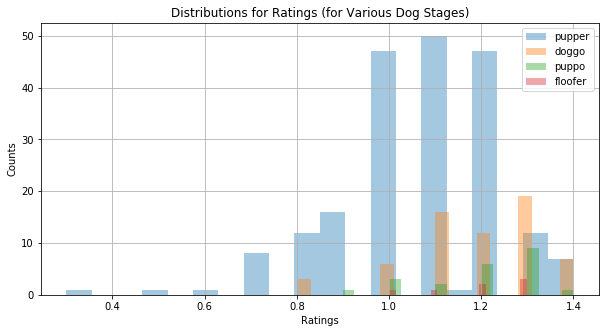

In [34]:
df_dog_stage.rating[pupper_mask].hist(label='pupper', alpha=0.4, bins=20, figsize=(10,5));
df_dog_stage.rating[doggo_mask].hist(label='doggo', alpha=0.4, bins=20, figsize=(10,5));
df_dog_stage.rating[puppo_mask].hist(label='puppo', alpha=0.4, bins=20, figsize=(10,5));
df_dog_stage.rating[floofer_mask].hist(label='floofer', alpha=0.4, bins=20, figsize=(10,5));
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.title("Distributions for Ratings (for Various Dog Stages)")
plt.legend();

**Looks like 'doggo' and 'puppo' get higher ratings!**

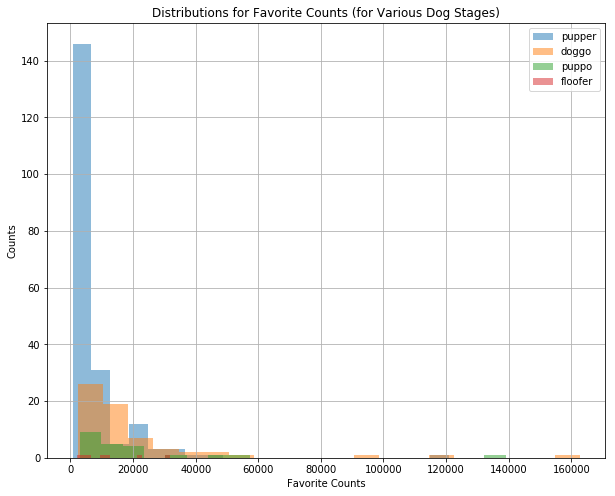

In [41]:
df_dog_stage.favorite_count[pupper_mask].hist(label='pupper', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.favorite_count[doggo_mask].hist(label='doggo', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.favorite_count[puppo_mask].hist(label='puppo', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.favorite_count[floofer_mask].hist(label='floofer', alpha=0.5, bins=20, figsize=(10,8));
plt.xlabel("Favorite Counts")
plt.ylabel("Counts")
plt.title("Distributions for Favorite Counts (for Various Dog Stages)")
plt.legend();

**Looks like higher favorite counts go to 'doggo' and 'puppo'!**  

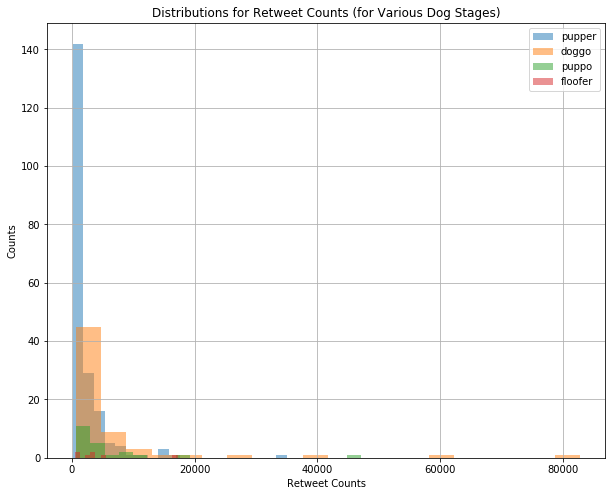

In [42]:
df_dog_stage.retweet_count[pupper_mask].hist(label='pupper', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.retweet_count[doggo_mask].hist(label='doggo', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.retweet_count[puppo_mask].hist(label='puppo', alpha=0.5, bins=20, figsize=(10,8));
df_dog_stage.retweet_count[floofer_mask].hist(label='floofer', alpha=0.5, bins=20, figsize=(10,8));
plt.xlabel("Retweet Counts")
plt.ylabel("Counts")
plt.title("Distributions for Retweet Counts (for Various Dog Stages)")
plt.legend();

**Looks like 'doggle' also get higher retweet counts!**

In [43]:
df_dog_stage_groups = df_dog_stage.query('(dog_stage != "doggo,pupper") and (dog_stage != "doggo,floofer") and (dog_stage != "doggo,puppo")')

In [44]:
dog_stage_g1 = df_dog_stage_groups.groupby('dog_stage')['rating'].mean()
dog_stage_g1

dog_stage
doggo      1.188889
floofer    1.200000
other      1.175866
pupper     1.063680
puppo      1.200000
Name: rating, dtype: float64

In [45]:
dog_stage_g2 = df_dog_stage_groups.groupby('dog_stage')['favorite_count'].mean()
dog_stage_g2

dog_stage
doggo      19902.904762
floofer    12557.285714
other       8190.202967
pupper      6941.231527
puppo      21597.590909
Name: favorite_count, dtype: float64

In [46]:
dog_stage_g3 = df_dog_stage_groups.groupby('dog_stage')['retweet_count'].mean()
dog_stage_g3

dog_stage
doggo      6992.539683
floofer    4635.714286
other      2433.221365
pupper     2223.768473
puppo      6214.500000
Name: retweet_count, dtype: float64

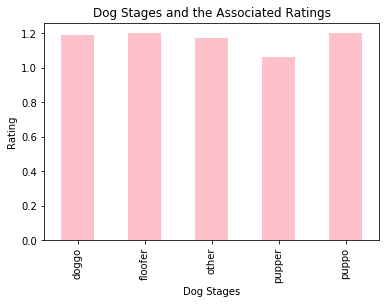

In [47]:
dog_stage_g1.plot(kind='bar', color='pink');
plt.xlabel("Dog Stages")
plt.ylabel("Rating")
plt.title("Dog Stages and the Associated Ratings");

**'Puppo' and 'floofer' get highest ratings!**

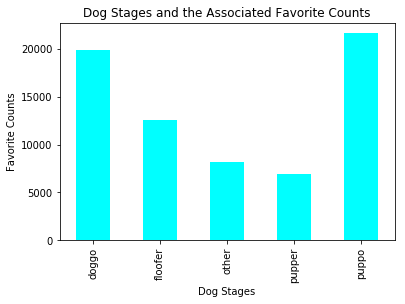

In [48]:
dog_stage_g2.plot(kind='bar', color='cyan');
plt.xlabel("Dog Stages")
plt.ylabel("Favorite Counts")
plt.title("Dog Stages and the Associated Favorite Counts");

**'Puppo' and 'doggo' get top 2 favorit counts!**

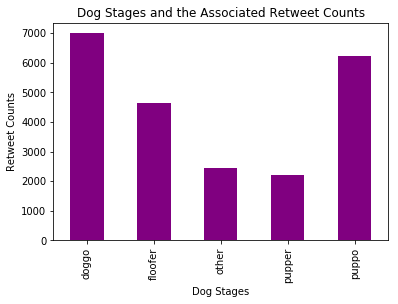

In [49]:
dog_stage_g3.plot(kind='bar', color='purple');
plt.xlabel("Dog Stages")
plt.ylabel("Retweet Counts")
plt.title("Dog Stages and the Associated Retweet Counts");

**'Doggo' and 'puppo' get top 2 retweet counts!**

### Insights:
#### Insights 1:
> - The dog breeds get top 3 rankings in rating are: saluki, briard, and tibetan_mastiff.
> - Among the dog breeds which get top 20 ranking in ratings, the top 3 ranking in favorite counts are: saluki, cardigan and eskimo_dog; and the top 3 ranking in retweet counts are: eskimo_dog, saluki and great_pyrenees.
> - Rating does not have high correlations with favorite_count/retweet_count, while favorite_count does have high correlations with retweet_count.

#### Insights 2:
From year 2015 to year 2017, among the top 20 favored dog breeds:
> - Top 2 favored dog breeds in 2015 are: great_pyrenees and english_springer. 
> - Top 2 favored dog breeds in 2016 are: eskimo_dog and irish_water_spaniel. 
> - Top 2 favored dog breeds in 2017 are: standard_poodle and lakeland_terrier.
> - Some restrictions to our findings: 1) in year 2015, we have data only for last few months, and in year 2017, we have data only upto Aug 1st. The data might not be evenly distributed among different months. 2) Favorite counts are much higher in year 2017 compared to previous 2 years. But this should be OK if the comparsions are just within the same year.

#### Insights 3:
Among different dog stages:
> - Puppo and floofer got top 2 ratings.
> - Puppo and doggo got top 2 favorite counts.
> - Doggo and puppo got top 2 retweet counts.
> - Lowest rating/favirote counts/retweet counts goes to pupper. Dog in other stages (might be older or bigger) get 2nd lowest rating/counts.

In general, people favor younger(or smaller) dogs than older(or bigger) dogs - exceptions: if the dogs are too young or too small. 